#1. Configuração Inicial

In [310]:
# Instalando a biblioteca Faker para gerar dados
!pip install -q Faker

In [311]:
import pandas as pd
import numpy as np
import datetime
from faker import Faker
import random

#Criando o Dataset para análise

In [312]:
fake = Faker('pt-BR')

# Gerando um DataFrame simplificado com dados de vendas

dados_vendas = {
    'ID': range(1, 101), # Gera números em sequencia de 1 a 100
    'Data': [fake.date_between_dates(date_start=datetime.date(2023, 1, 1), date_end=datetime.date(2023, 12, 31)) for _ in range(100)], # Gera datas aleatórias entre 01-01-23 a 31-12-23
    'Produto': [fake.random_element(elements=('Café', 'Bola', 'Boné', 'Arroz', 'NaN')) for _ in range(100)], # Cria uma lista com 100 produtos aleatórios escolhidos entre 'Café', 'Bola', 'Boné', 'Arroz' e 'NaN'
    'Categoria': [fake.random_element(elements=('Eletrônicos', 'Vestuário', 'Alimentos', 'Casa', 'NaN')) for _ in range(100)], # Similar ao 'Produto', gera uma lista de 100 categorias aleatórias
    'Quantidade': [fake.random_number(digits=2) for _ in range(100)], # Gera uma lista de 100 números aleatórios de 2 dígitos, representando a quantidade vendida de cada produto
    'Preço': [round(random.uniform(10, 100), 1) for _ in range(100)] # Gera uma lista de 100 preços aleatórios entre 10 e 100, com uma casa decimal
}

# Criando um dataframe a partir de dados_vendas
df_vendas = pd.DataFrame(dados_vendas)


In [313]:
# Visualizando as primeiras linhas para garantir que os dados foram gerados corretamente
df_vendas.head()

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-08-28,NaN,Eletrônicos,83,70.6
1,2,2023-07-13,Arroz,Alimentos,44,11.4
2,3,2023-08-21,Boné,Alimentos,65,51.6
3,4,2023-03-08,NaN,Alimentos,28,58.2
4,5,2023-08-22,Café,Eletrônicos,93,75.5


In [314]:
# Salvando os dados em .csv
df_vendas.to_csv('vendas_2023.csv', index=False)

#2. Exploração Inicial

*   Objetivo: Analisar a estrutura e o conteúdo dos dados.



In [315]:
# Carregando o dataset para um DataFrame
df = pd.read_csv('vendas_2023.csv')

In [316]:
# Verifique informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          100 non-null    int64  
 1   Data        100 non-null    object 
 2   Produto     86 non-null     object 
 3   Categoria   86 non-null     object 
 4   Quantidade  100 non-null    int64  
 5   Preço       100 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.8+ KB


In [317]:
# Descrição estatística das colunas numéricas
df.describe()

,ID,Quantidade,Preço
count,100.000000,100.000000,100.00000
mean,50.500000,49.600000,53.33800
std,29.011492,28.790781,25.83238
min,1.000000,2.000000,11.40000
25%,25.750000,25.750000,33.12500
50%,50.500000,47.000000,53.40000
75%,75.250000,75.000000,74.15000
max,100.000000,98.000000,99.30000


#3. Limpeza de Dados


*   Objetivo: Tratar valores faltantes, remover duplicatas e converter tipos de dados.




In [318]:
# Removendo registros com valores nulos nas colunas 'Produto' e 'Categoria'
df = df.dropna(subset=['Produto', 'Categoria'])

In [319]:
# Removendo duplicatas, se houver
df = df.drop_duplicates()

In [344]:
# Convertendo a coluna 'Data' para o formato datetime
df['Data'] = pd.to_datetime(df['Data'], format='%d-%m-%Y')

In [345]:
# Verificando novamente para garantir que a limpeza foi realizada corretamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            75 non-null     int64         
 1   Data          75 non-null     datetime64[ns]
 2   Produto       75 non-null     object        
 3   Categoria     75 non-null     object        
 4   Quantidade    75 non-null     int64         
 5   Preço         75 non-null     float64       
 6   Total_Vendas  75 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 4.2+ KB


In [346]:
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preço,Total_Vendas
0,2,2023-07-13,Arroz,Alimentos,44,11.4,501.6
1,3,2023-08-21,Boné,Alimentos,65,51.6,3354.0
2,5,2023-08-22,Café,Eletrônicos,93,75.5,7021.5
3,6,2023-02-11,Bola,Vestuário,6,83.4,500.4
4,7,2023-09-04,Bola,Vestuário,77,77.3,5952.1


In [323]:
# Salvando o dataset limpo
df.to_csv('data_clean.csv', index=False)

In [ ]:
# Fazendo o download do arquivo salvo
from google.colab import files
files.download('data_clean.csv')

#4. Análise de Vendas


*   Objetivo: Calcular o total de vendas por produto e identificar o produto com o maior número de vendas.




In [347]:
# Calculando o total de vendas (Quantidade * Preço) para cada produto
df['Total_Vendas'] = df['Quantidade'] * df['Preço']

# Vizualizando a nova coluna 'Total_Vendas'
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preço,Total_Vendas
0,2,2023-07-13,Arroz,Alimentos,44,11.4,501.6
1,3,2023-08-21,Boné,Alimentos,65,51.6,3354.0
2,5,2023-08-22,Café,Eletrônicos,93,75.5,7021.5
3,6,2023-02-11,Bola,Vestuário,6,83.4,500.4
4,7,2023-09-04,Bola,Vestuário,77,77.3,5952.1


In [348]:
# Identificando total de vendas por produto
total_vendas_produto = df.groupby('Produto')['Total_Vendas'].sum().sort_values()
total_vendas_produto

,Total_Vendas
Produto,
Bola,40316.9
Arroz,47441.9
Boné,51658.2
Café,84226.3


In [349]:
# Identificando o produto com o maior número de vendas totais
produto_mais_vendas = df.groupby('Produto')['Total_Vendas'].sum().idxmax()
maior_venda_total = df.groupby('Produto')['Total_Vendas'].sum().max()

# Exibindo os resultados
print(f"Produto com o maior número de vendas: {produto_mais_vendas}")
print(f"Valor total de vendas para esse produto: R$ {maior_venda_total:,.2f}")

Produto com o maior número de vendas: Café
Valor total de vendas para esse produto: R$ 84,226.30


#Análise Exploratória de Dados de Vendas

##1. Importar Bibliotecas para Visualização


*   Objetivo: Importar as bibliotecas necessárias para criar gráficos.



In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraando estilo dos gráficos
sns.set(style="whitegrid")

##2. Gráfico de Linha: Tendência de Vendas ao Longo do Tempo


*   Objetivo: Criar um gráfico de linha que mostre a tendência das vendas ao longo do tempo.



In [351]:
df.head()

,ID,Data,Produto,Categoria,Quantidade,Preço,Total_Vendas
0,2,2023-07-13,Arroz,Alimentos,44,11.4,501.6
1,3,2023-08-21,Boné,Alimentos,65,51.6,3354.0
2,5,2023-08-22,Café,Eletrônicos,93,75.5,7021.5
3,6,2023-02-11,Bola,Vestuário,6,83.4,500.4
4,7,2023-09-04,Bola,Vestuário,77,77.3,5952.1


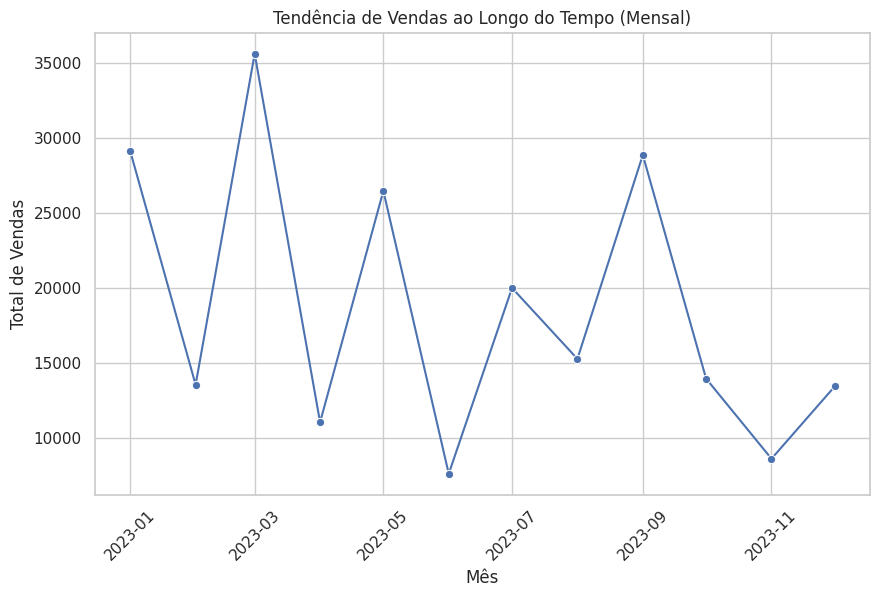

In [366]:
# Localizando a coluna dos meses em data
df['Mês'] = df['Data'].dt.to_period('M').dt.to_timestamp()

# Agrupando os dados por mês e calcular o total de vendas para cada mês
vendas_por_mes = df.groupby('Mês')['Total_Vendas'].sum().reset_index()

# Plotando o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(data=vendas_por_mes, x='Mês', y='Total_Vendas', marker='o')
plt.title('Tendência de Vendas ao Longo do Tempo (Mensal)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()


#3. Identificação de Padrões e Insights


*   Objetivo: Analisar os dados e descrever pelo menos dois padrões ou insights observados.



##Vendas por Categoria de Produto

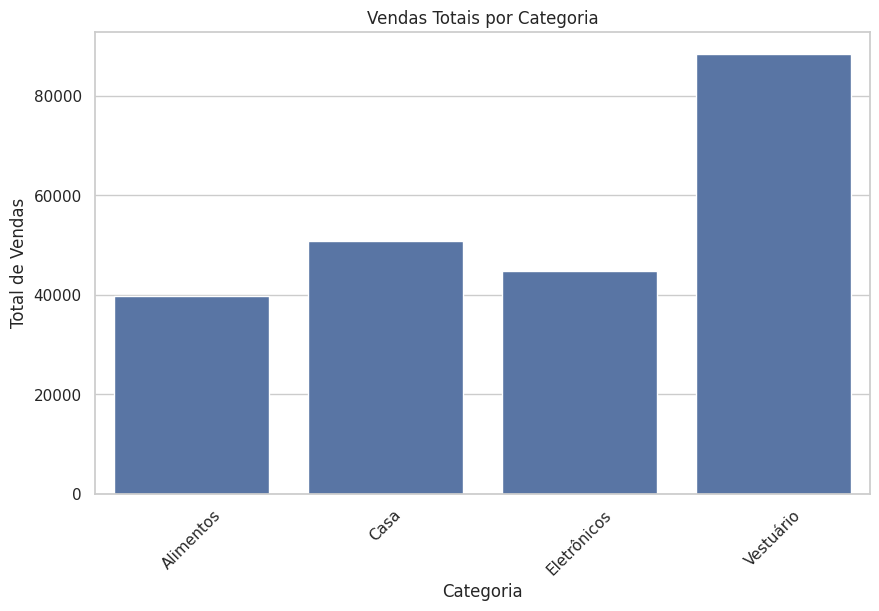

In [367]:
# Agrupar os dados por categoria e calcular o total de vendas
vendas_por_categoria = df.groupby('Categoria')['Total_Vendas'].sum().reset_index()

# Plotar um gráfico de barras para vendas por categoria
plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_por_categoria, x='Categoria', y='Total_Vendas')
plt.title('Vendas Totais por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()


##Distribuição de Vendas por Preço

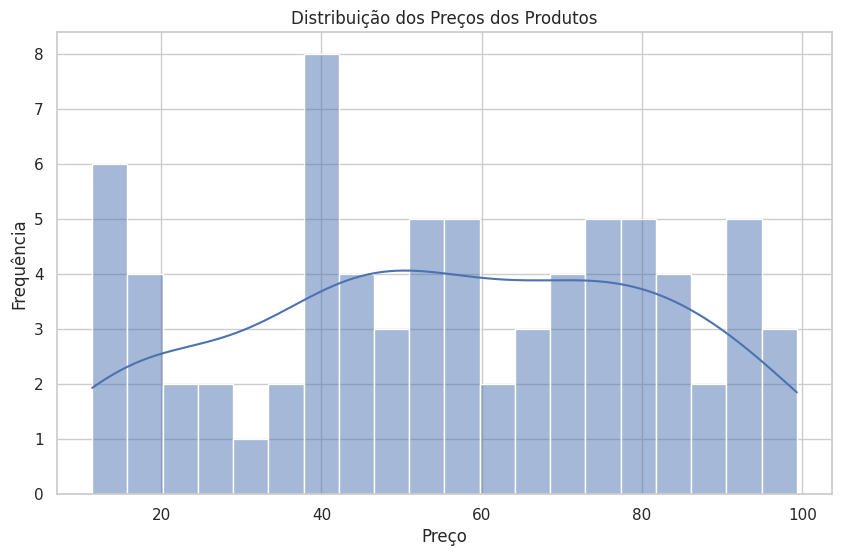

In [368]:
# Plotando um histograma para a distribuição dos preços dos produtos
plt.figure(figsize=(10, 6))
sns.histplot(df['Preço'], bins=20, kde=True)
plt.title('Distribuição dos Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

#Insights



Descrevendo os padrões observados a partir dos gráficos.



Baseado nos gráficos acima, podemos começar a identificar tendências. Por exemplo:


###Tendência de Vendas ao Longo do Tempo (Mensal)###


*   O gráfico de linha mostra uma clara tendência de queda nas vendas ao longo dos meses, com um pico acentuado em Março.

*   Isso pode indicar uma sazonalidade ou um evento específico que impulsionou as vendas durante esse período.

*   Determinadas categorias de produtos podem ter vendas significativamente maiores do que outras, o que pode sugerir foco em estratégias de marketing específicas para essas categorias.  


###Vendas por Categoria de Produto###

*    Algumas categorias de produtos apresentam vendas significativamente maiores do que outras.

  Por exemplo, a categoria "Vestuário" pode estar liderando em vendas, enquanto "Alimentos" tem um desempenho menor.


###Distribuição de Preços dos Produtos###




*   Variação de Preços: Os preços dos produtos estão distribuídos ao longo de um intervalo amplo, de cerca de 10 a 100 reais.

*  Picos de Frequência: Há picos notáveis na frequência em torno de 15, 40, e 80 reais, onde muitos produtos estão concentrados. Isso indica que esses intervalos de preços são populares ou comuns entre os produtos.


